<a href="https://colab.research.google.com/github/AlanD117P/Actividades-Alan/blob/main/Actividad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 5: Uso de software para búsqueda, Alan David Perez Perez Matricula: 1956828 carrera:IMTC

In [ ]:
#librerias
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos MNIST
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalizar los datos
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
# Definir la arquitectura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Capa de entrada: aplanar la imagen
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas para las 10 clases y activación softmax
    ])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',  # Optimizador Adam
              loss='sparse_categorical_crossentropy',  # Función de pérdida
              metrics=['accuracy'])  # Métrica de evaluación

In [ ]:
# Entrenar el modelo
model.fit(train_data, train_labels, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2555 - accuracy: 0.9274
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1130 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0788 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9855


In [ ]:
# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Exactitud del modelo en datos de prueba:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0736 - accuracy: 0.9770
Exactitud del modelo en datos de prueba: 0.9769999980926514


In [ ]:
# Función para visualizar imágenes con predicciones y valores reales
def visualize_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
        plt.axis('off')
    plt.show()

In [ ]:
# Realizar 5 predicciones con el conjunto de datos de prueba
predicted_labels = []
for i in range(5):
    prediction = model.predict(test_data[i:i+1])
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
    true_label = test_labels[i]
    predicted_labels.append(predicted_label)
    print("Predicción:", predicted_label, "| Valor real:", true_label)

1/1 [==============================] - 0s 28ms/step
Predicción: 7 | Valor real: 7
1/1 [==============================] - 0s 20ms/step
Predicción: 2 | Valor real: 2
1/1 [==============================] - 0s 22ms/step
Predicción: 1 | Valor real: 1
1/1 [==============================] - 0s 24ms/step
Predicción: 0 | Valor real: 0
1/1 [==============================] - 0s 23ms/step
Predicción: 4 | Valor real: 4


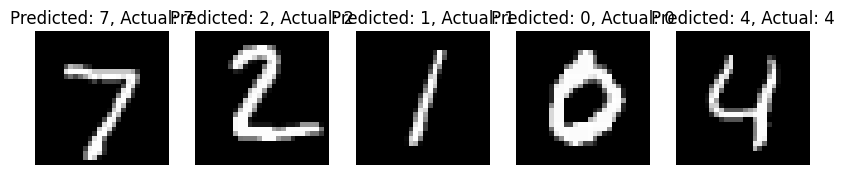

In [ ]:
# Visualizar las imágenes junto con las predicciones y los valores reales
visualize_images(test_data[:5], test_labels[:5], predicted_labels)